In [0]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

#Aula 1 - Conhecendo os Dados

In [0]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

In [0]:
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['Filme Id','Título','Gêneros']

filmes.head()



,Filme Id,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.Gêneros.str.get_dummies()
dados_filmes = pd.concat([filmes,generos], axis = 1)
dados_filmes.head()

,Filme Id,Título,Gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

#Aula 2 - Começando a Agrupar 

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 4)
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 0 ... 1 2 0]


#Aula 3 - Vendo os centroides (Parte 1)

In [0]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.24874435 -0.2017969  -0.2574346  -0.14712549  1.21592785
  -0.12663563 -0.21748944 -0.31404349 -0.1079098  -0.09171818 -0.1794245
  -0.1164527   0.09184061 -0.18714387  0.30090222 -0.2060271  -0.41806128
  -0.1180699  -0.04372652]
 [ 0.05305113  0.18901308 -0.02085415 -0.24984731 -0.25036803 -0.74933149
   0.16221719 -0.21748944  0.37481668 -0.08380599  0.0830257   0.18610065
   0.00568041 -0.12957804  0.16121699 -0.11443654  0.12894485  0.38627498
   0.10888739  0.05390026]
 [-0.05917995  0.06416031  1.09029168  2.62990516  2.21944183  0.10115684
  -0.31024783 -0.21748944 -0.62611959  1.06987913 -0.09492563 -0.25976158
   0.41116897  0.43800508 -0.12512724 -0.25848932  0.1968689  -0.45562778
  

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_ , columns = generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.248744,-0.201797,-0.257435,-0.147125,1.215928,-0.126636,-0.217489,-0.314043,-0.107910,-0.091718,-0.179425,-0.116453,0.091841,-0.187144,0.300902,-0.206027,-0.418061,-0.118070,-0.043727
1,0.053051,0.189013,-0.020854,-0.249847,-0.250368,-0.749331,0.162217,-0.217489,0.374817,-0.083806,0.083026,0.186101,0.005680,-0.129578,0.161217,-0.114437,0.128945,0.386275,0.108887,0.053900
2,-0.059180,0.064160,1.090292,2.629905,2.219442,0.101157,-0.310248,-0.217489,-0.626120,1.069879,-0.094926,-0.259762,0.411169,0.438005,-0.125127,-0.258489,0.196869,-0.455628,-0.165695,-0.095853
3,-0.059180,-0.457322,-0.345353,-0.230558,-0.261433,-0.605349,-0.340042,4.597924,-0.799694,-0.278052,-0.094926,-0.318930,0.015544,-0.026045,-0.230667,-0.430352,-0.334435,-0.479773,-0.061510,-0.114556


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb92c0d550>,
      dtype=object)

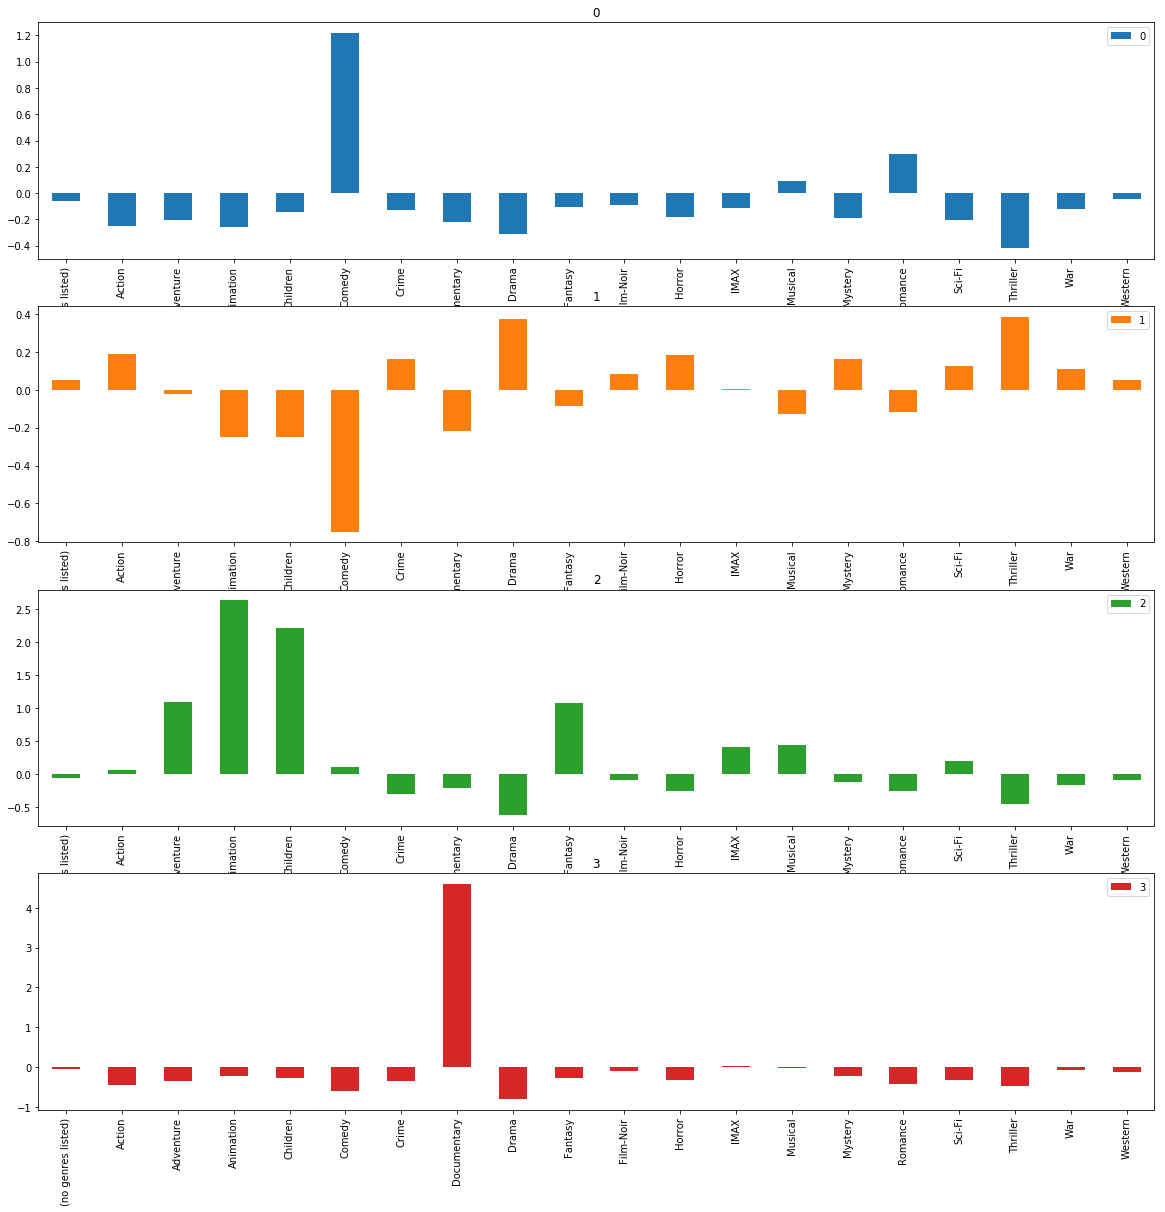

In [0]:
grupos.transpose().plot.bar(subplots = True, sharex = False, figsize = (20,20))

In [0]:
filtro = modelo.labels_ == 1
dados_filmes[filtro].sample(10)

,Filme Id,Título,Gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3348,4535,"Man from Snowy River, The (1982)",Drama|Romance|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1748,2346,"Stepford Wives, The (1975)",Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3829,5373,"Cranes Are Flying, The (Letyat zhuravli) (1957)",Drama|Romance|War,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7440,81087,Luck by Chance (2009),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8103,100498,"Good Day to Die Hard, A (2013)",Action|Crime|Thriller|IMAX,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
6540,54686,"Last Legion, The (2007)",Action|Adventure|Fantasy|War,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9357,161582,Hell or High Water (2016),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
914,1213,Goodfellas (1990),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
826,1086,Dial M for Murder (1954),Crime|Mystery|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4221,6140,Tenebre (1982),Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [0]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[ 35.745323 , -60.808807 ],
       [-18.259537 , -42.27745  ],
       [-20.7695   ,  43.524048 ],
       ...,
       [ -1.9335835,  21.685904 ],
       [ 25.90989  , -34.265755 ],
       [  2.5623806, -21.342865 ]], dtype=float32)

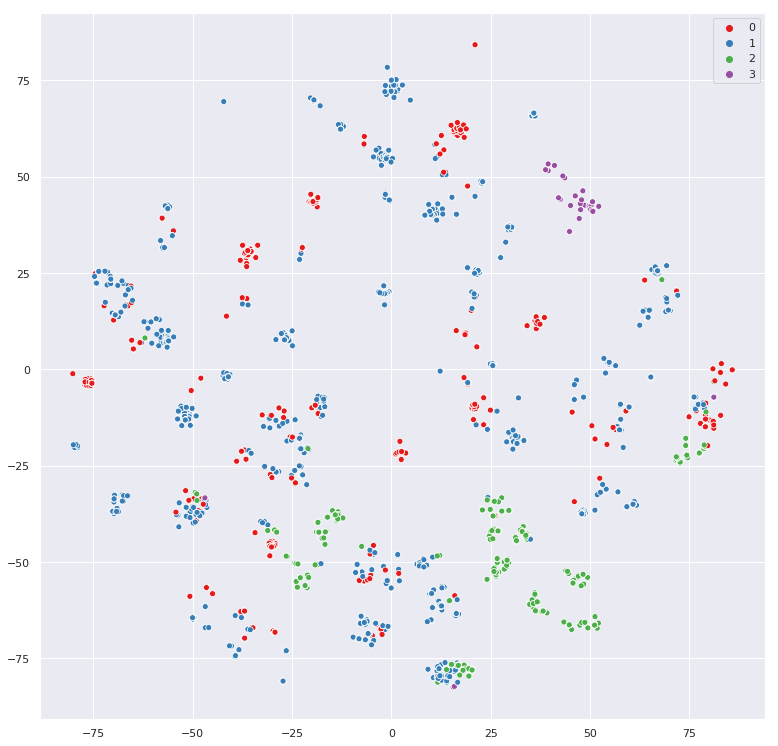

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue = modelo.labels_, palette = sns.color_palette('Set1',4))

#Aula 3 - Parte 2 - Como Visualizar os Centroides em um Gráfico

In [0]:
from sklearn.datasets import make_blobs

dados,_ = make_blobs(n_samples = 1000, n_features = 2, random_state = 7)

dados = pd.DataFrame(dados, columns =['Coluna1','Coluna2'])
dados.head()


,Coluna1,Coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


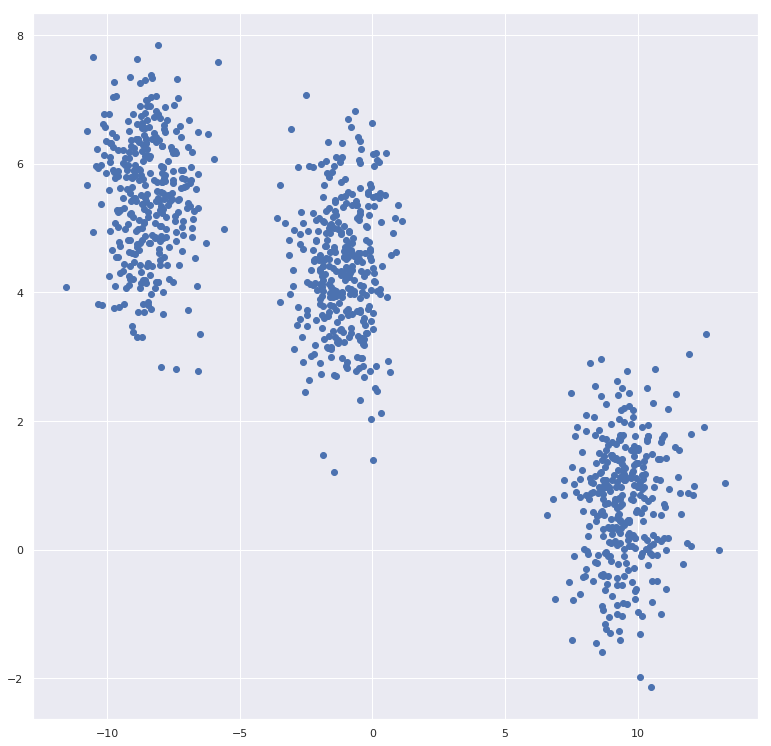

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.Coluna1, y=dados.Coluna2)

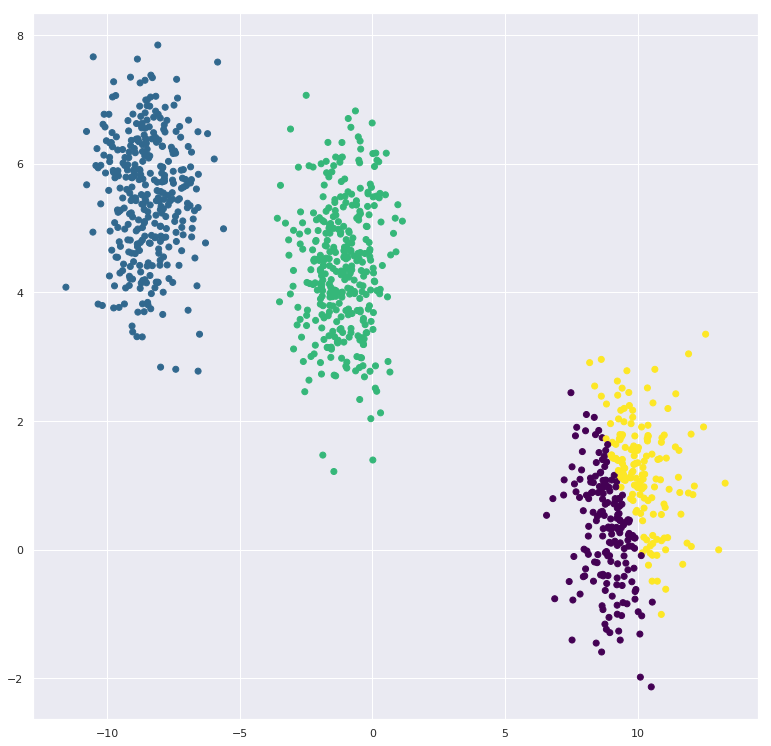

In [0]:
modelo = KMeans(n_clusters=4)
grupos = modelo.fit_predict(dados)

plt.scatter(x=dados.Coluna1, y=dados.Coluna2, c=grupos, cmap = 'viridis')

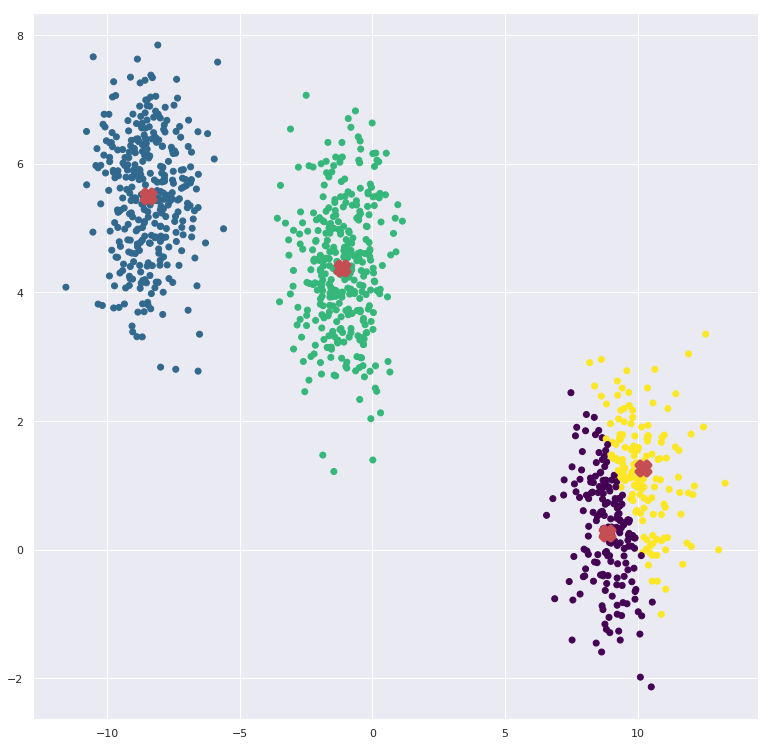

In [0]:
centroides = modelo.cluster_centers_
plt.scatter(dados.Coluna1, dados.Coluna2, c = grupos, cmap = 'viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='r', zorder=2)

#Aula 4 - Escolhendo o número de Grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8cee1748>,
      dtype=object)

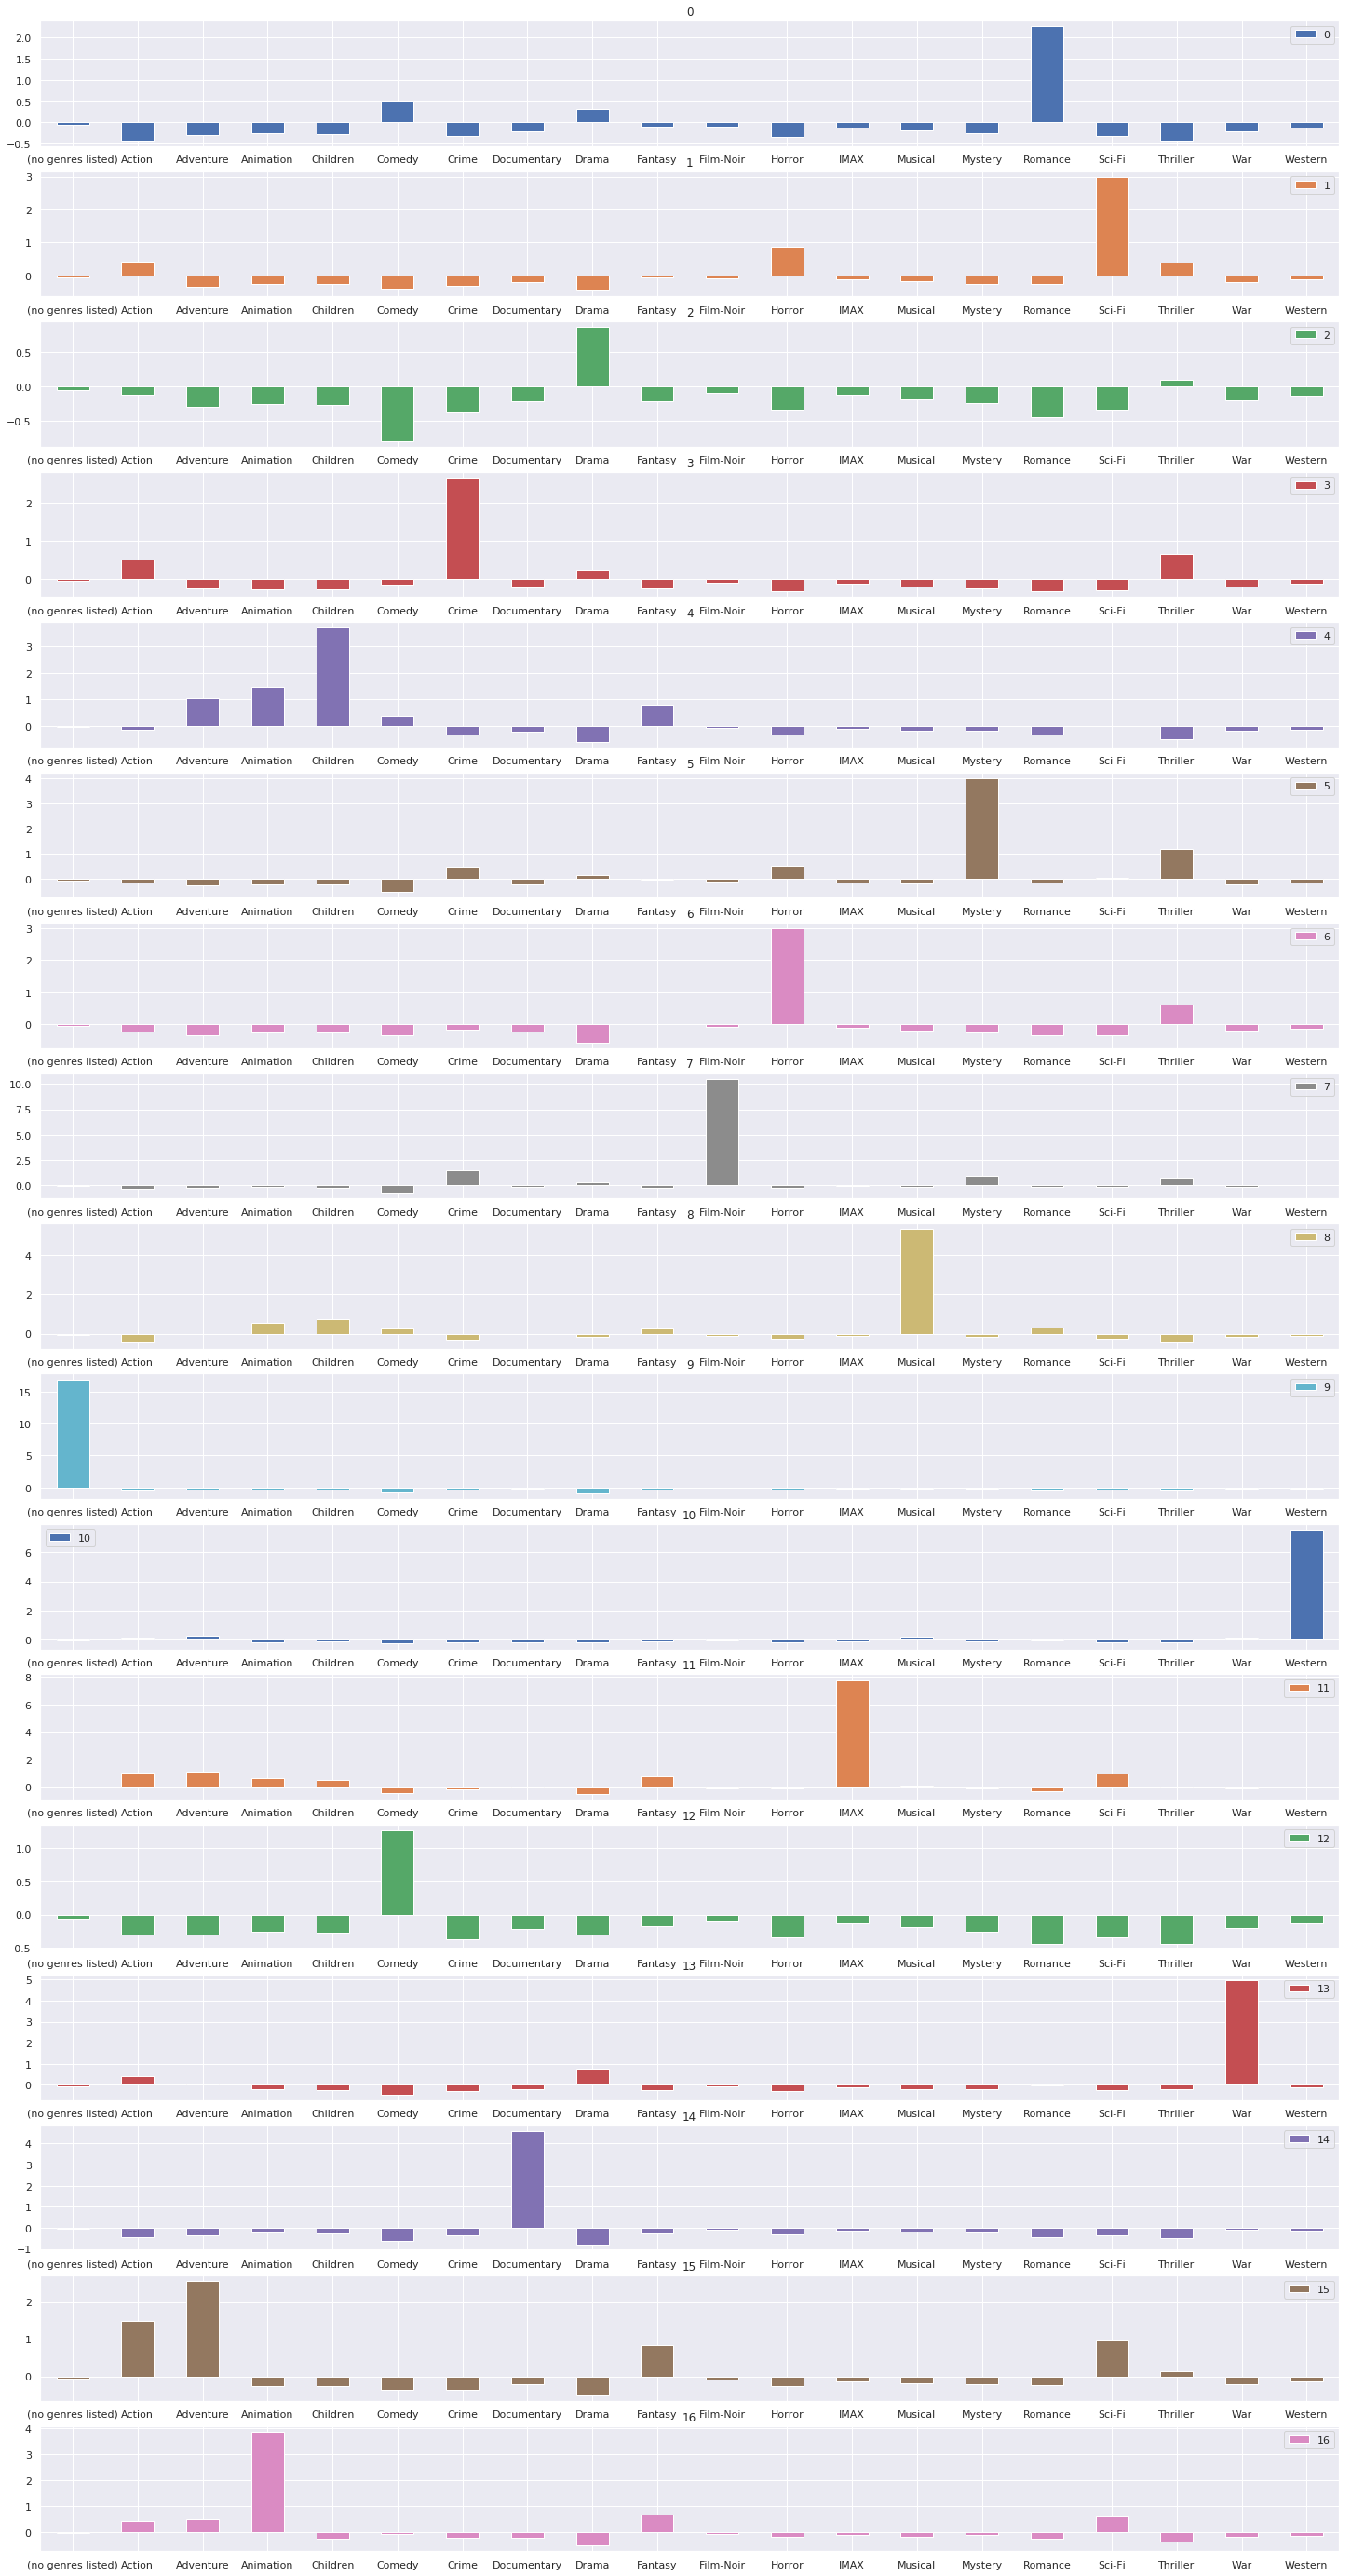

In [0]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_ , columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize = (25,50), sharex = False, rot=0 )

In [0]:
filtro = modelo.labels_ == 5
dados_filmes[filtro].sample(10)

,Filme Id,Título,Gêneros,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9668,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
9508,170945,It Comes at Night (2017),Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5074,7982,"Tale of Two Sisters, A (Janghwa, Hongryeon) (2...",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7813,92507,Safe House (2012),Action|Crime|Mystery|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5632,27317,Audition (Ôdishon) (1999),Drama|Horror|Mystery|Romance|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
3854,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
132,159,Clockers (1995),Crime|Drama|Mystery,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5509,26453,Smiley's People (1982),Drama|Mystery,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
685,903,Vertigo (1958),Drama|Mystery|Romance|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
7121,71108,"White Ribbon, The (Das weiße Band) (2009)",Drama|Mystery,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [0]:
def kmeans(num_de_clusters, generos):                # Função que retorna o número de grupos e o erro
  modelo = KMeans(n_clusters = num_de_clusters)
  modelo.fit(generos)
  return(num_de_clusters, modelo.inertia_)

In [0]:
kmeans(20, generos_escalados)

(20, 55826.87510291837)

In [0]:
resultado = [kmeans(num_de_clusters,generos_escalados) for num_de_clusters in range(1,41)]
resultado

[(1, 194840.0),
 (2, 179774.31395430857),
 (3, 166142.64614181506),
 (4, 157549.56741868562),
 (5, 147641.95428240695),
 (6, 137237.7352467134),
 (7, 128346.99376770148),
 (8, 119454.12077840636),
 (9, 110295.94982543177),
 (10, 104104.35646523123),
 (11, 94904.35843397335),
 (12, 88481.60140771238),
 (13, 82894.35060212103),
 (14, 71940.64460008746),
 (15, 71285.06771232728),
 (16, 65300.1497416841),
 (17, 62467.12150090054),
 (18, 57973.74250173773),
 (19, 57169.677105868774),
 (20, 54570.96600974093),
 (21, 54184.77044261432),
 (22, 52258.47193187497),
 (23, 50794.85043871911),
 (24, 50132.03852983155),
 (25, 47565.2695695457),
 (26, 46859.80851088754),
 (27, 45789.95676883203),
 (28, 44332.86122349344),
 (29, 43912.718887717805),
 (30, 43114.2262055612),
 (31, 41244.50889125309),
 (32, 40699.93468656783),
 (33, 39781.52477779458),
 (34, 39996.927628199795),
 (35, 38654.96766731793),
 (36, 37892.809403770276),
 (37, 36818.41427612437),
 (38, 36454.18337585444),
 (39, 36200.345391523

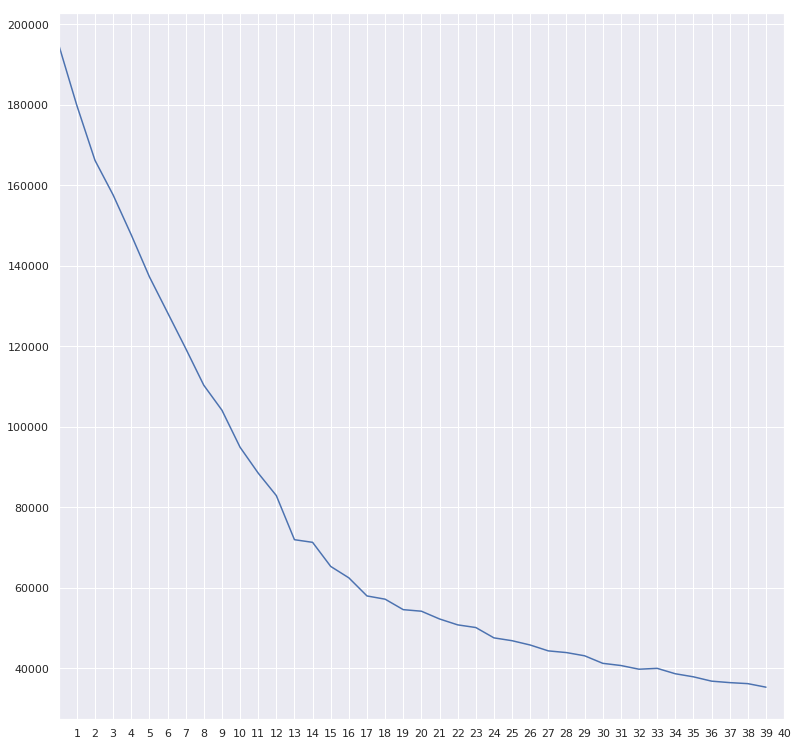

In [0]:
resultado = pd.DataFrame(resultado, columns =['grupos','inertia'])

resultado.inertia.plot(xticks=resultado.grupos)                       # Elbow Method

#Aula 5 - Agrupamento Hierárquico

In [0]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters = 17)

grupos = modelo.fit_predict(generos_escalados)
grupos


NameError: ignored

In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-50.705177 , -11.160942 ],
       [-25.45534  ,  52.012478 ],
       [-31.199368 ,   2.5302625],
       ...,
       [ -6.184017 ,   5.2506094],
       [-42.32749  ,  33.3883   ],
       [ 33.39175  ,   2.7372248]], dtype=float32)

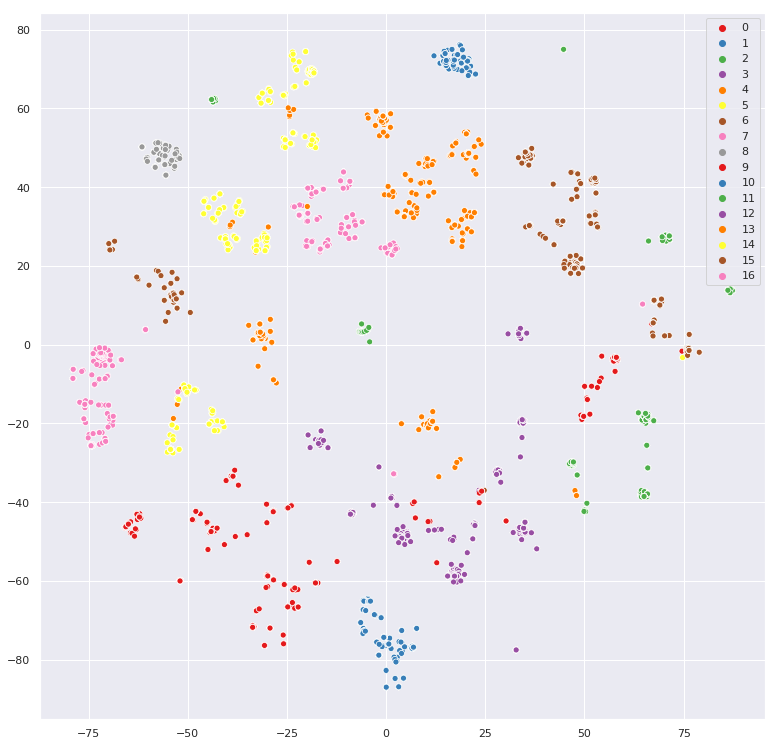

In [0]:
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue = grupos, palette = sns.color_palette('Set1',17))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8b6883c8>,
      dtype=object)

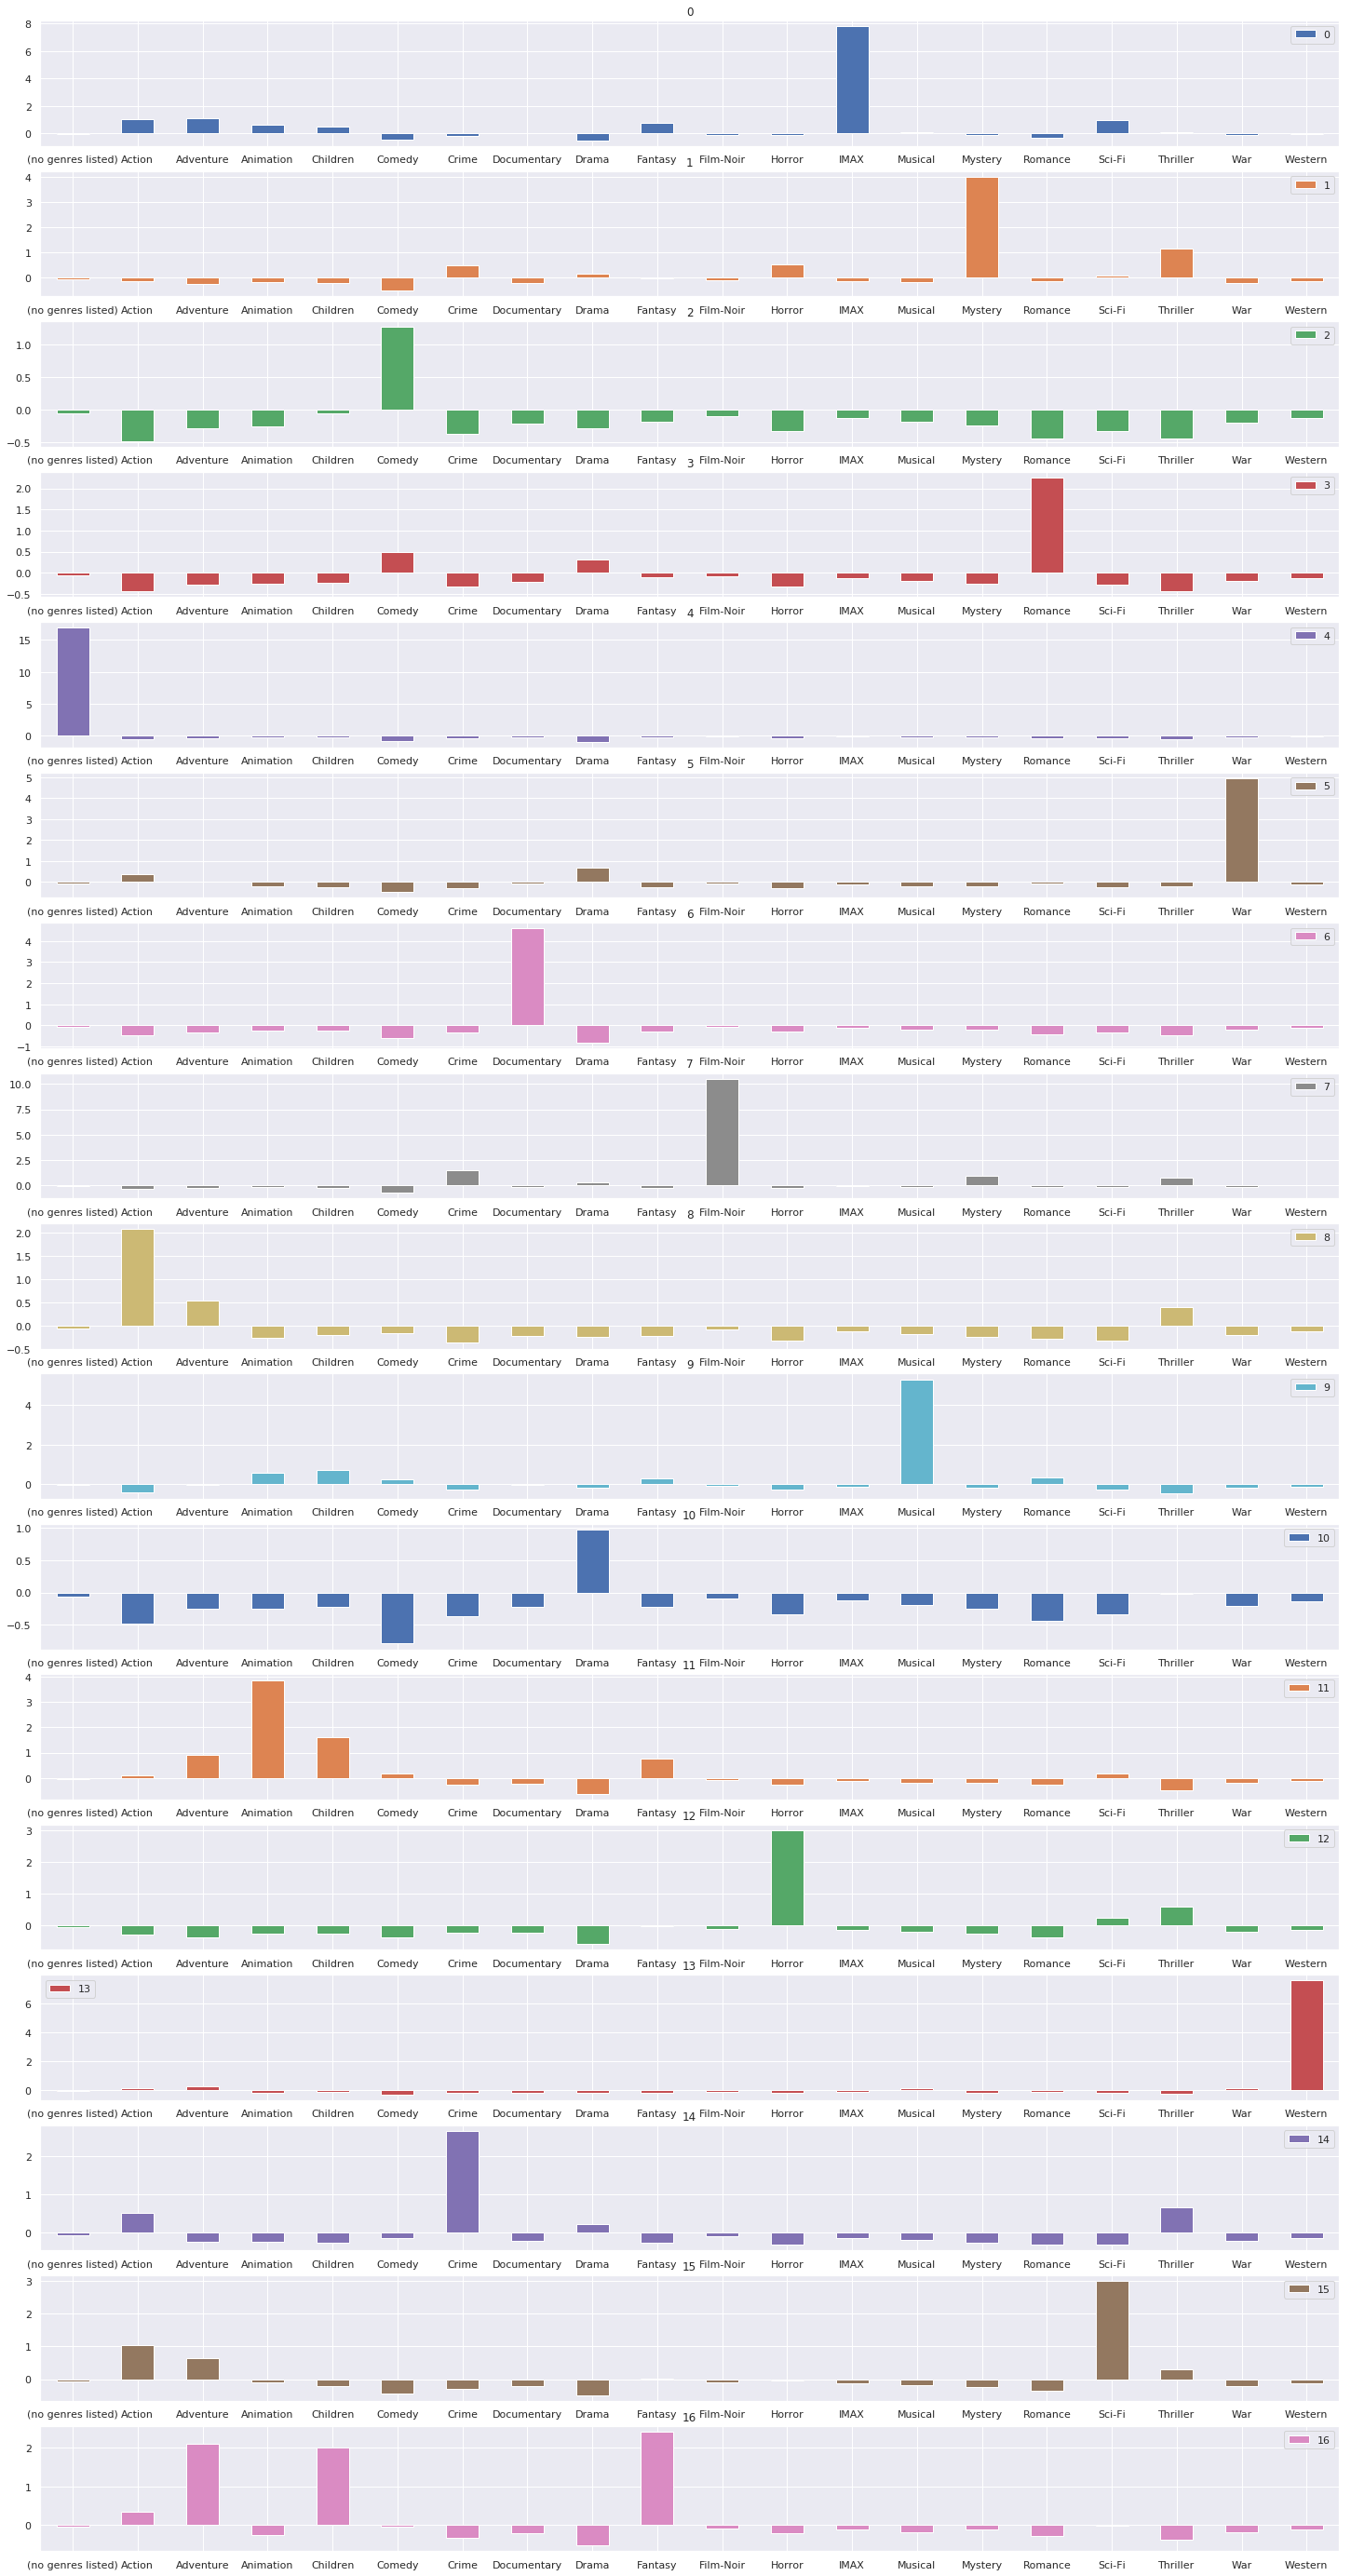

In [0]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_ , columns = generos.columns)


grupos.transpose().plot.bar(subplots = True, figsize = (25,50), sharex = False, rot = 0)

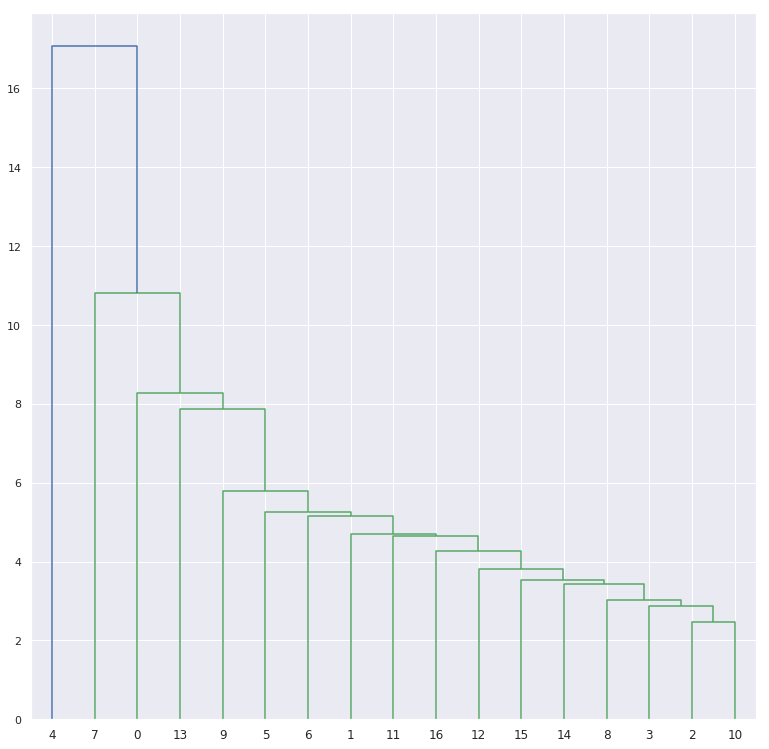

In [0]:
matriz_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_distancia)

#Aula 5 - Outra forma de Agrupamento

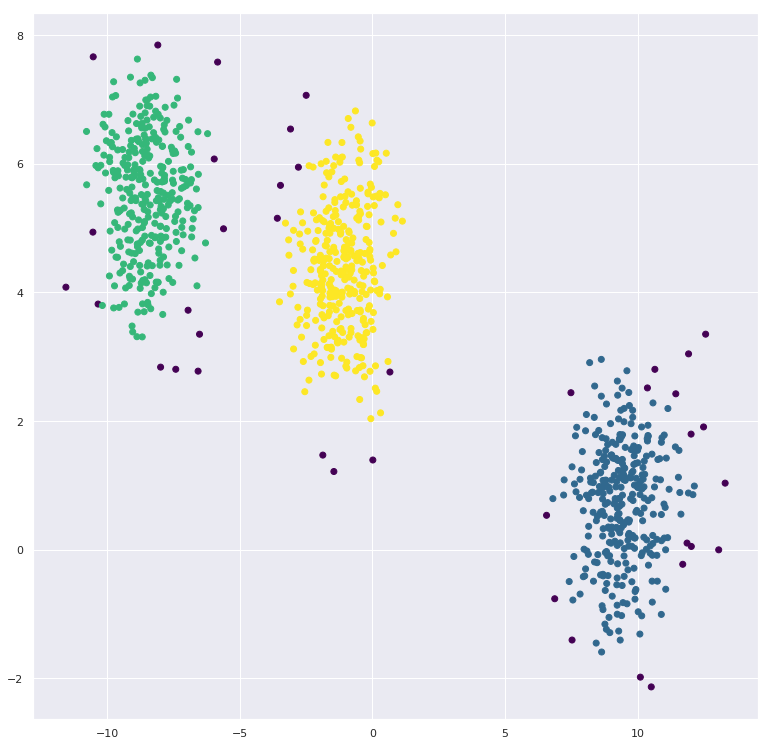

In [0]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN()

grupos = modelo.fit_predict(dados) 

plt.scatter(x=dados.Coluna1, y=dados.Coluna2, c=grupos, cmap = 'viridis')